In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('seeds_dataset.txt', sep="\t", header=None)

data.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 
                'length of kernel groove', 'class']

data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
data.shape

(210, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
data.dtypes.value_counts()

float64    7
int64      1
dtype: int64

In [6]:
data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


area                       0.0
perimeter                  0.0
compactness                0.0
length of kernel           0.0
width of kernel            0.0
asymmetry coefficient      0.0
length of kernel groove    0.0
class                      0.0
dtype: float64

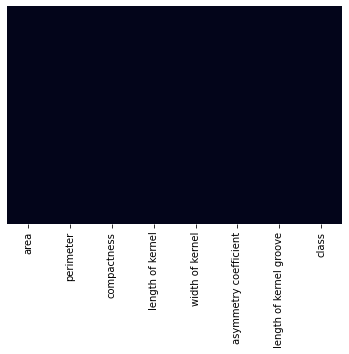

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

## EDA
### Univariate Analysis

In [8]:
# unique values
data.apply(lambda x:x.unique())

area                       [15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14....
perimeter                  [14.84, 14.57, 14.09, 13.94, 14.99, 14.21, 14....
compactness                [0.871, 0.8811, 0.905, 0.8955, 0.9034, 0.8951,...
length of kernel           [5.763, 5.553999999999999, 5.291, 5.324, 5.657...
width of kernel            [3.312, 3.333, 3.3369999999999997, 3.378999999...
asymmetry coefficient      [2.221, 1.018, 2.699, 2.259, 1.355, 2.46199999...
length of kernel groove    [5.22, 4.956, 4.825, 4.805, 5.175, 5.218999999...
class                                                              [1, 2, 3]
dtype: object

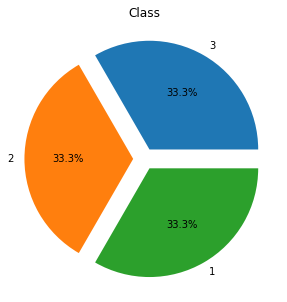

In [9]:
plt.figure(figsize=(10,5))

plt.pie(data['class'].value_counts().values, 
        explode=(0.1,0.1,0.1),
        autopct = '%0.1f%%',
        labels = data['class'].value_counts().index)

plt.title('Class')
plt.show()

- the target classes are distributed evenly.

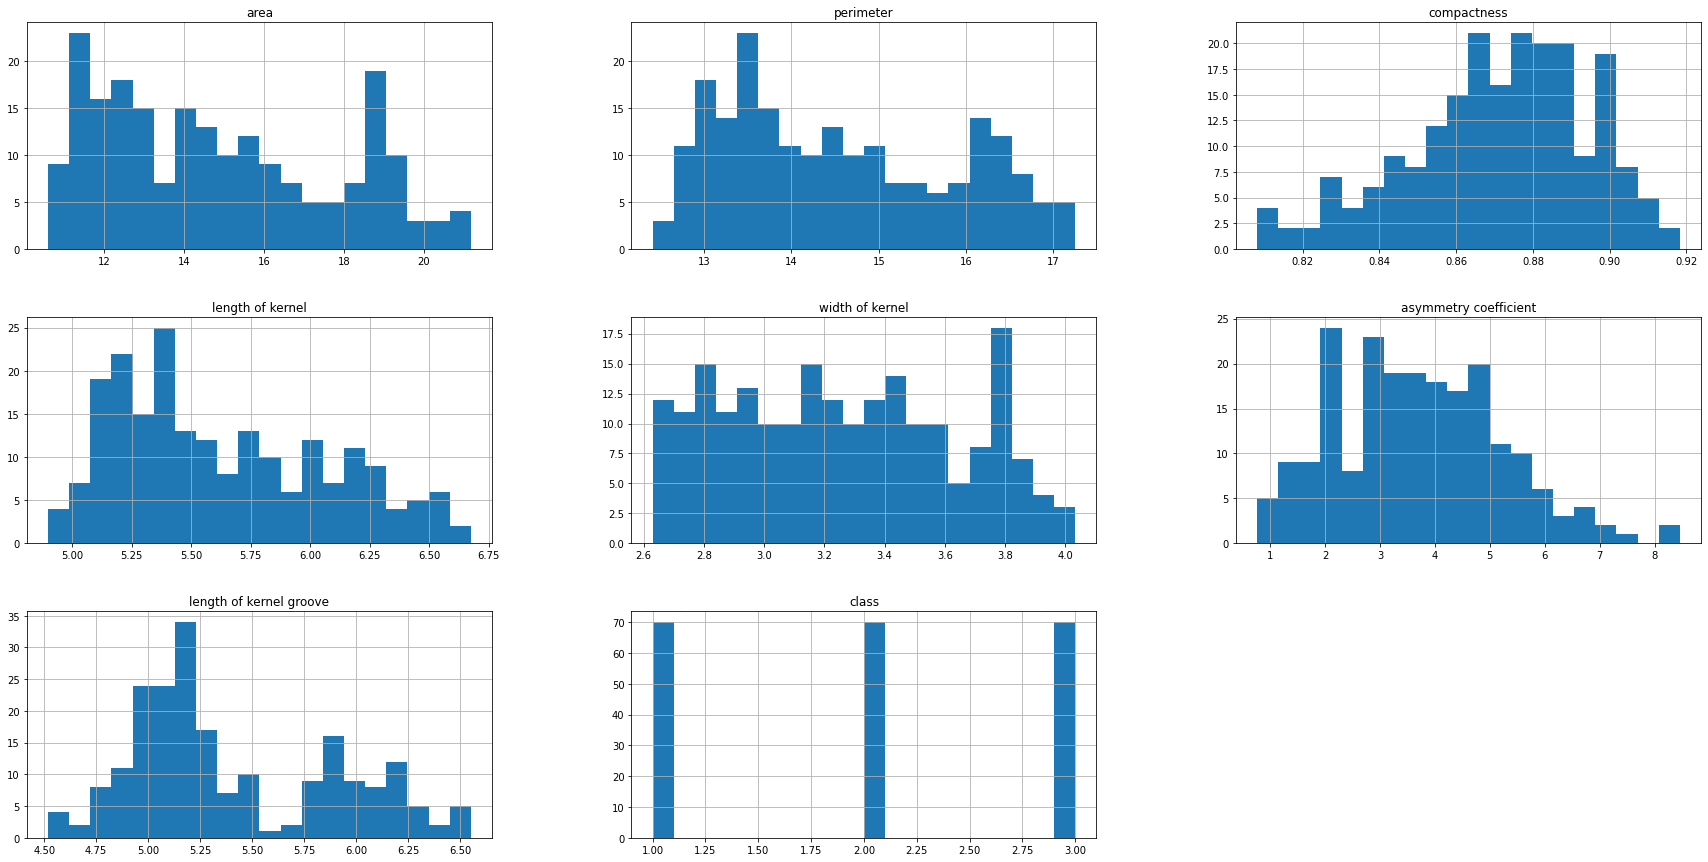

In [10]:
data.hist(bins=20, figsize=(30,15))
plt.show()

<AxesSubplot:xlabel='class', ylabel='compactness'>

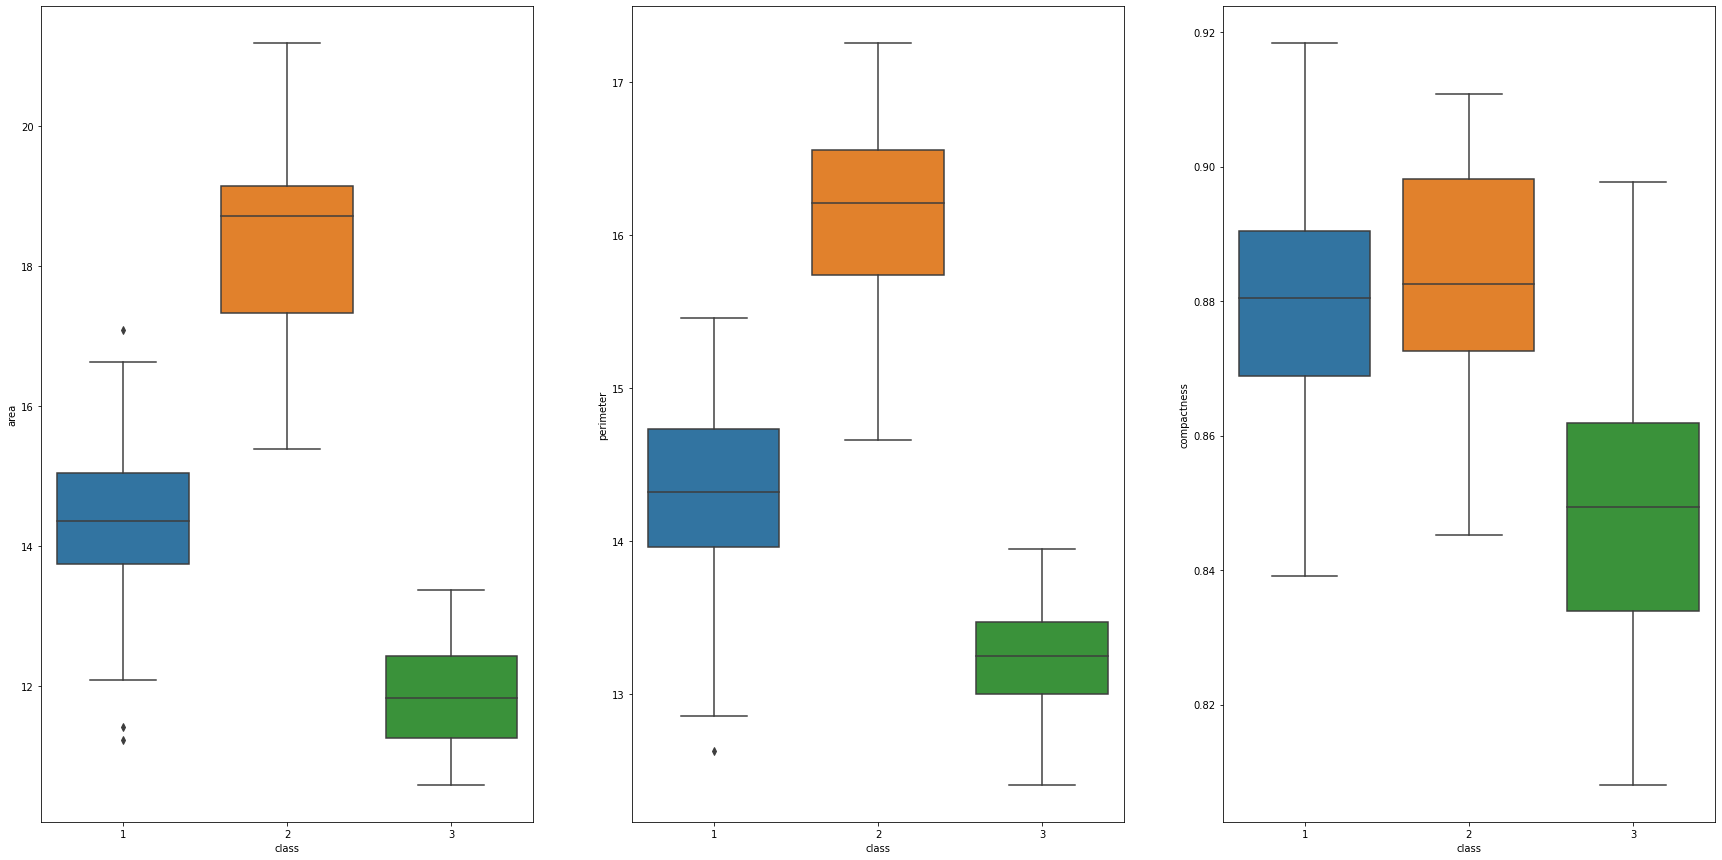

In [11]:
fig, axes = plt.subplots(1,3, figsize=(30,15))

sns.boxplot(x='class', y='area', data=data, ax=axes[0])
sns.boxplot(x='class', y='perimeter', data=data, ax=axes[1])
sns.boxplot(x='class', y='compactness', data=data, ax=axes[2])

<AxesSubplot:xlabel='class', ylabel='length of kernel groove'>

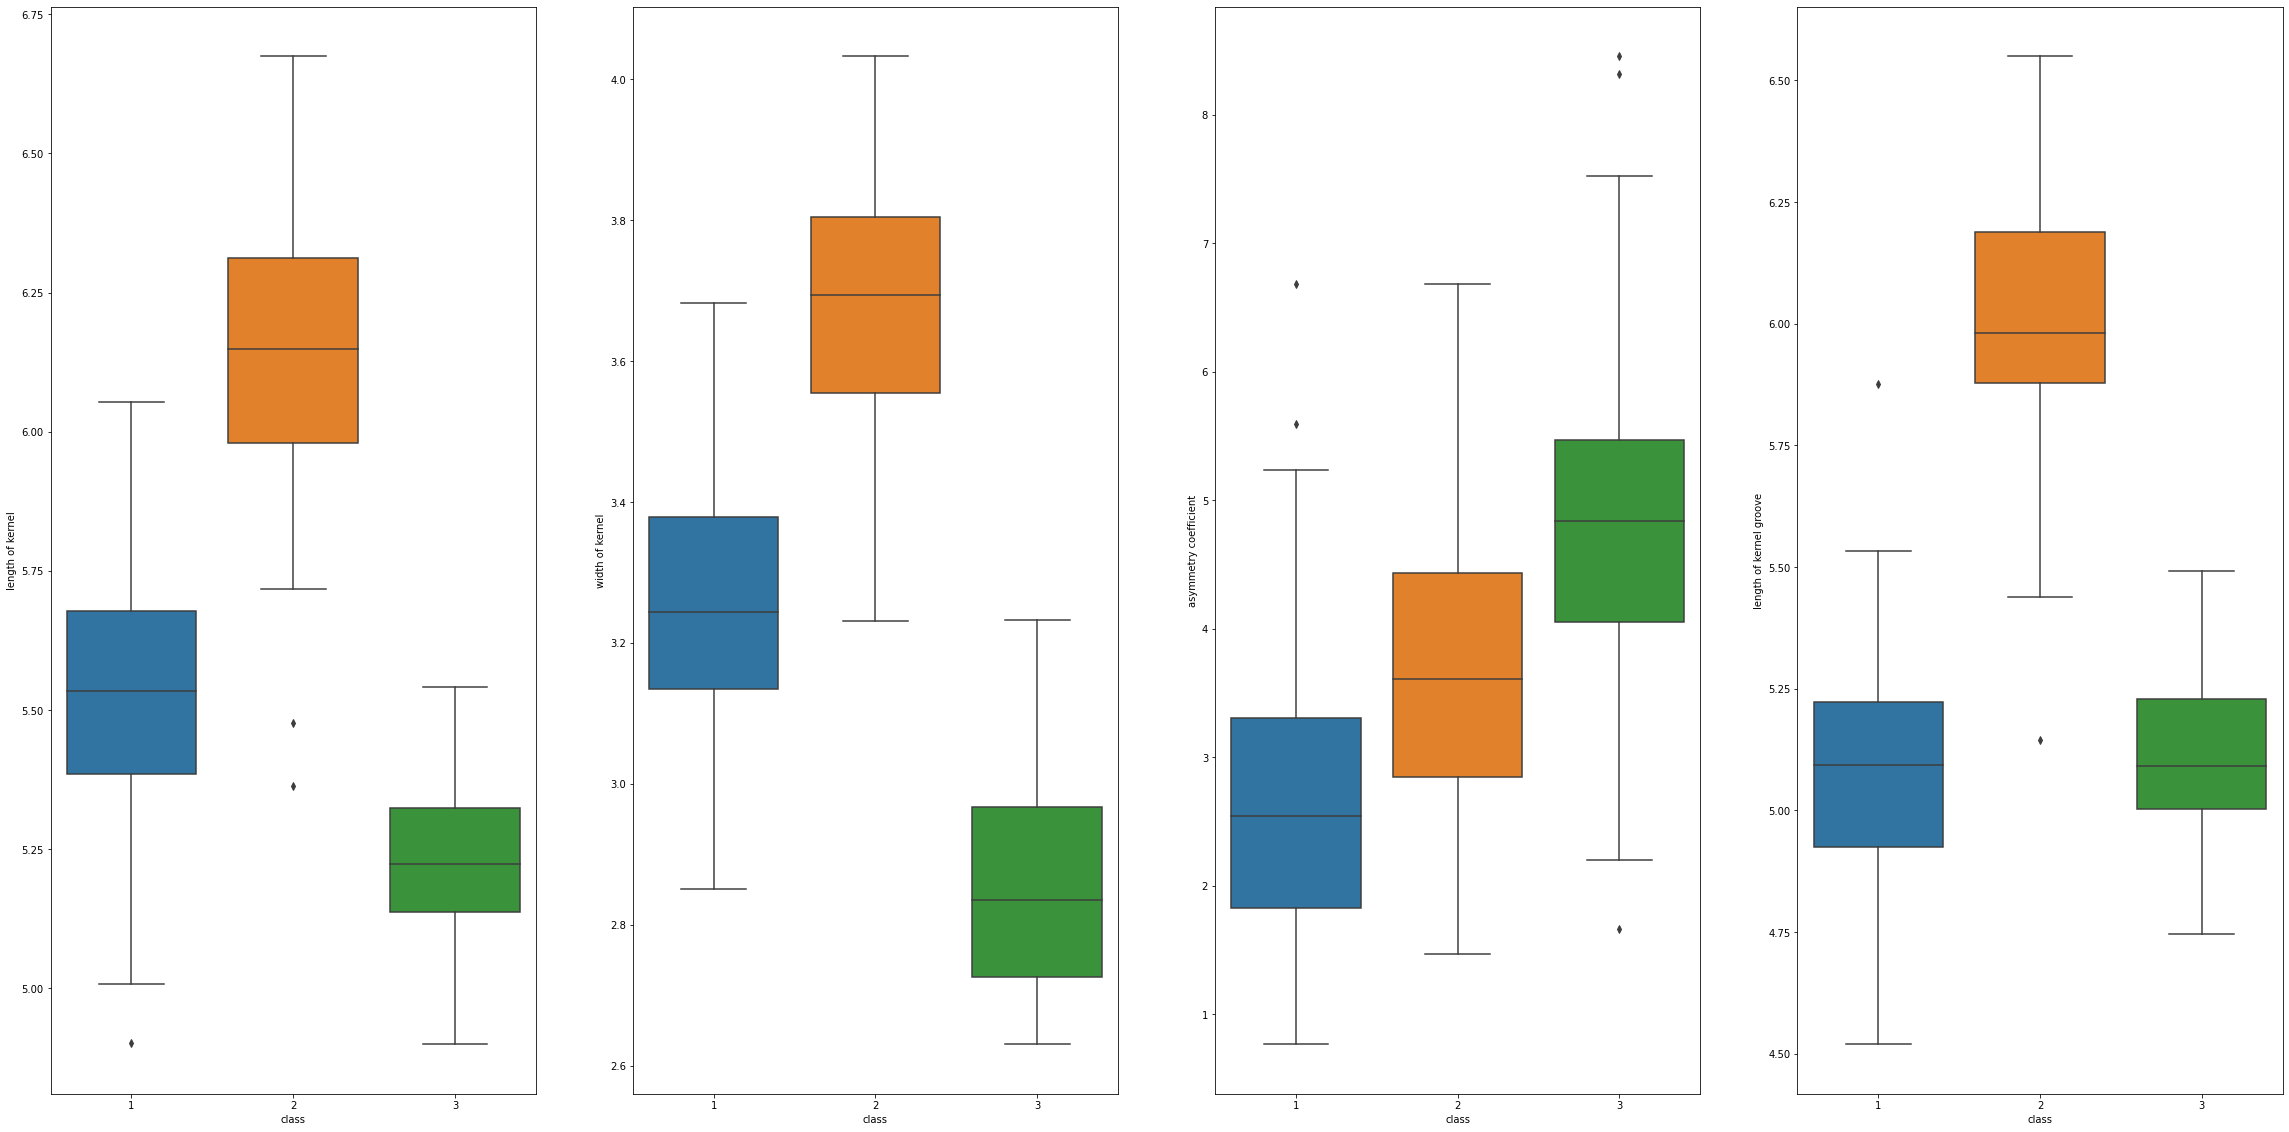

In [12]:
fig, axes = plt.subplots(1,4, figsize=(40,20))

sns.boxplot(x='class', y='length of kernel', data=data, ax=axes[0])
sns.boxplot(x='class', y='width of kernel', data=data, ax=axes[1])
sns.boxplot(x='class', y='asymmetry coefficient', data=data, ax=axes[2])
sns.boxplot(x='class', y='length of kernel groove', data=data, ax=axes[3])

- not a lot of outliers and the range is not that wide too.

### Bi-variate Analysis

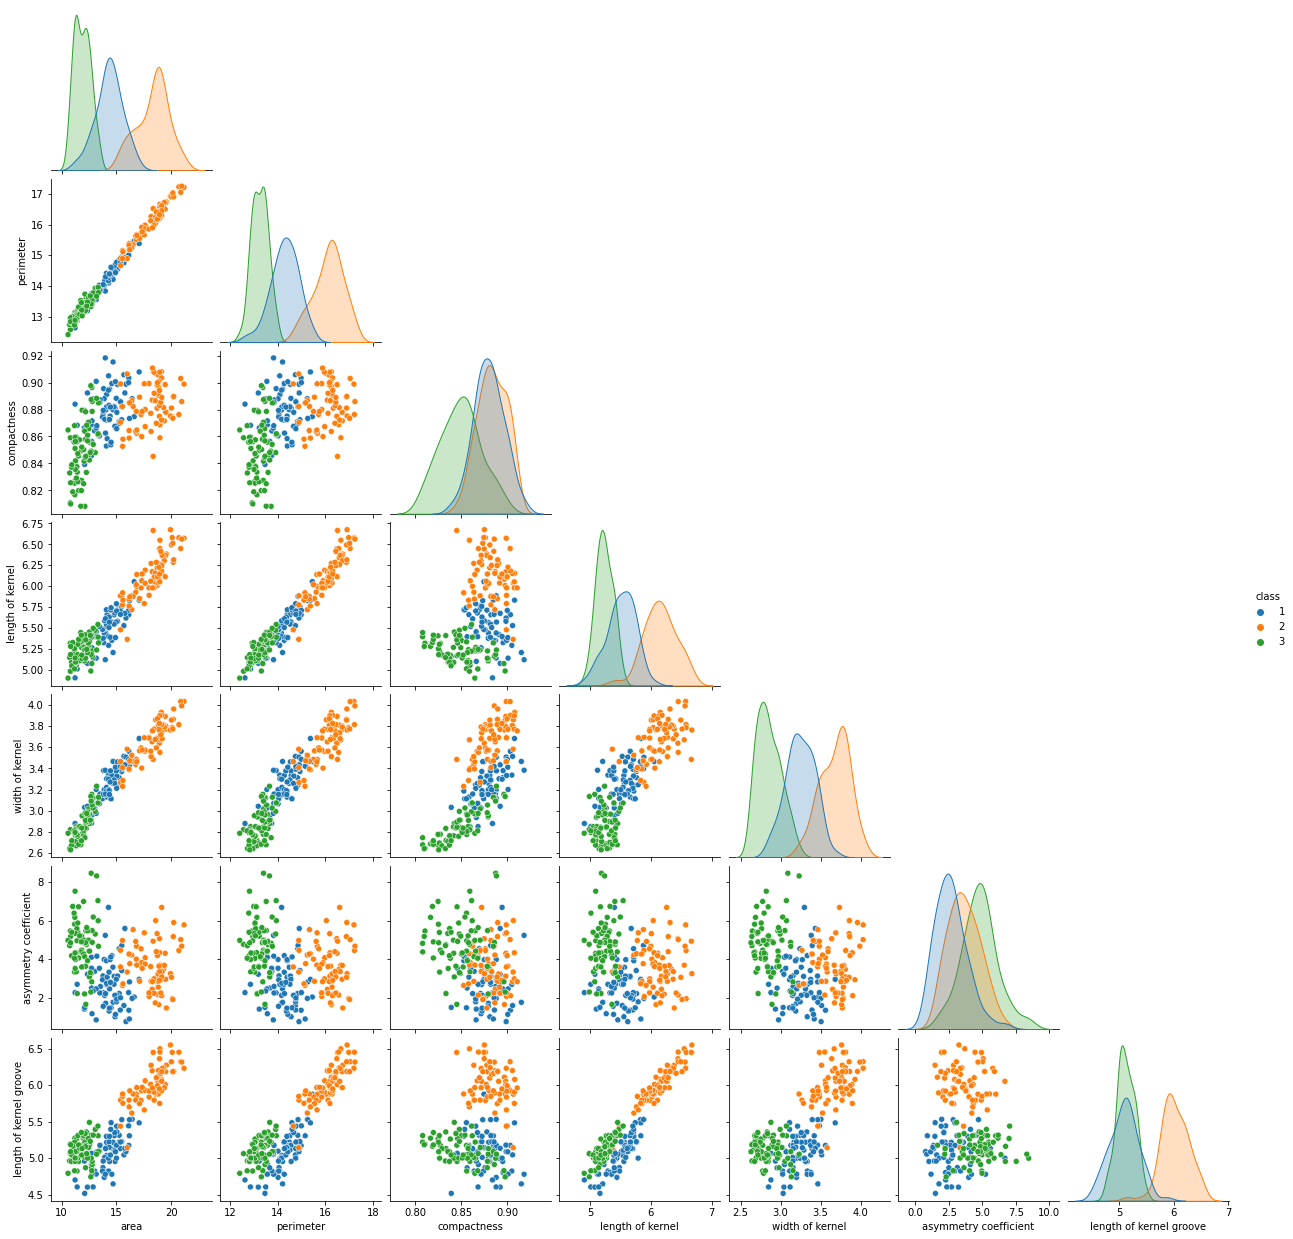

In [13]:
sns.pairplot(data, corner=True, hue='class', palette='tab10')

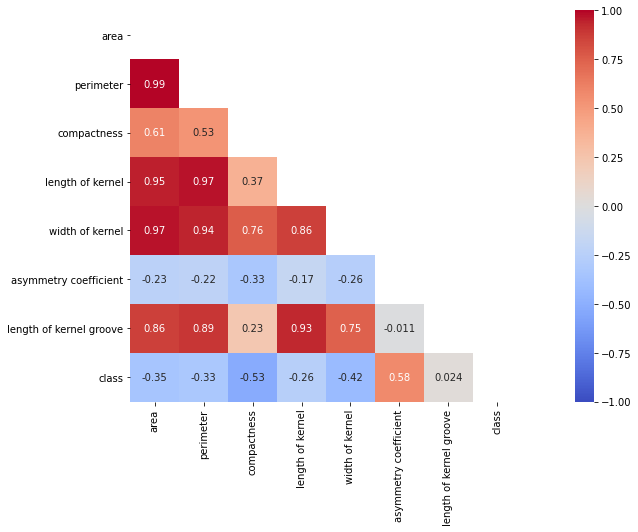

In [14]:
# correlation with each other
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(15,7.5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            square=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()

- there are a lot of features with collinearity relationships.
- **asymmetry coefficient** is highly correlated with the target **class**

## Data Pre-processing

In [15]:
X = data.drop('class', axis=1)

y = data['class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=101)

In [18]:
X_train_nom = X_train.copy()
X_test_nom = X_test.copy()

In [19]:
scaler = MinMaxScaler()

scaler.fit(X_train_nom)

X_train_nom = scaler.transform(X_train_nom)
X_test_nom = scaler.transform(X_test_nom)

## Model Selection

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

In [21]:
models = []

models.append(('LogReg', LogisticRegression(random_state=101)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(random_state=101)))

In [22]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [23]:
# using k-fold of 3 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=3, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train_nom, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.9166666666666666 (0.042089689356342115)
LDA: 0.9523809523809522 (0.008417937871268445)
DTC: 0.8392857142857144 (0.038575837490523)
RFC: 0.8690476190476191 (0.06890379108803704)
KNN: 0.9107142857142857 (0.025253813613805232)
NB: 0.8928571428571429 (0.029160592175990246)
SVM: 0.8988095238095237 (0.03669294049386296)


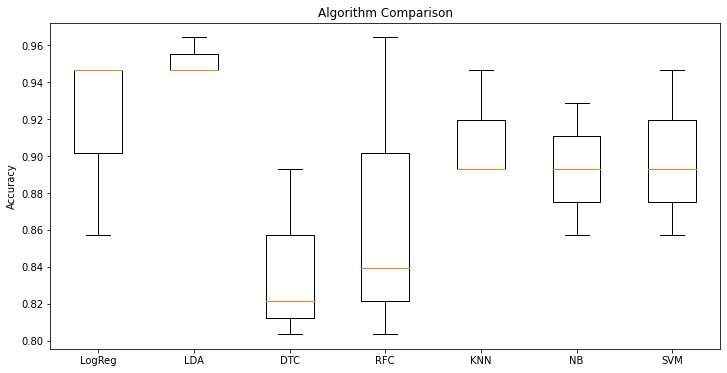

In [24]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

In [25]:
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train_nom, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[43  5  5]
 [ 2 60  0]
 [ 4  0 49]]
              precision    recall  f1-score   support

           1       0.88      0.81      0.84        53
           2       0.92      0.97      0.94        62
           3       0.91      0.92      0.92        53

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.90      0.90      0.90       168

LDA:
[[48  2  3]
 [ 0 62  0]
 [ 3  0 50]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92        53
           2       0.97      1.00      0.98        62
           3       0.94      0.94      0.94        53

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168

DTC:
[[44  4  5]
 [ 2 60  0]
 [ 8  0 45]]
              precision    recall  f1-score   support

           1       0.81      0.83      0.82        53


- LDA, RFC, KNN and SVM all perform well enough for further evaluation.

## Parameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

In [91]:
pipe1 = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis())
pipe2 = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=101))
pipe3 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))
pipe4 = make_pipeline(MinMaxScaler(), SVC(random_state=101))

### LDA

In [140]:
param_grid = {'lineardiscriminatanalysis'}

In [141]:
pipe1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmaxscaler', 'lineardiscriminantanalysis', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'lineardiscriminantanalysis__covariance_estimator', 'lineardiscriminantanalysis__n_components', 'lineardiscriminantanalysis__priors', 'lineardiscriminantanalysis__shrinkage', 'lineardiscriminantanalysis__solver', 'lineardiscriminantanalysis__store_covariance', 'lineardiscriminantanalysis__tol'])

In [142]:
param_grid = {'lineardiscriminantanalysis__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             param_grid={'lineardiscriminantanalysis__solver': ['svd', 'lsqr',
                                                                'eigen']},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [143]:
grid_search.best_params_

{'lineardiscriminantanalysis__solver': 'svd'}

In [144]:
grid_search.best_score_

0.9508609908609909

In [145]:
lda = grid_search

In [134]:
def best_params_scores(model):
    cv_results = pd.DataFrame(model.cv_results_)
    
    metrics_mean = ['params','mean_train_accuracy','mean_test_accuracy','mean_train_f1_macro','mean_test_f1_macro']
    
    cv_results_mean = cv_results[metrics_mean]

    best_params = cv_results_mean['params']==model.best_params_
    best_scores = cv_results_mean['mean_test_f1_macro']==model.best_score_
    
    df_model = cv_results_mean[(best_params) & (best_scores)]
    
    return df_model

In [146]:
df_lda = best_params_scores(lda)

display(df_lda.T)

,0
params,{'lineardiscriminantanalysis__solver': 'svd'}
mean_train_accuracy,0.959659
mean_test_accuracy,0.952574
mean_train_f1_macro,0.957842
mean_test_f1_macro,0.950861


In [147]:
# get the best params coefficients
lda_coef = lda.best_estimator_._final_estimator.coef_

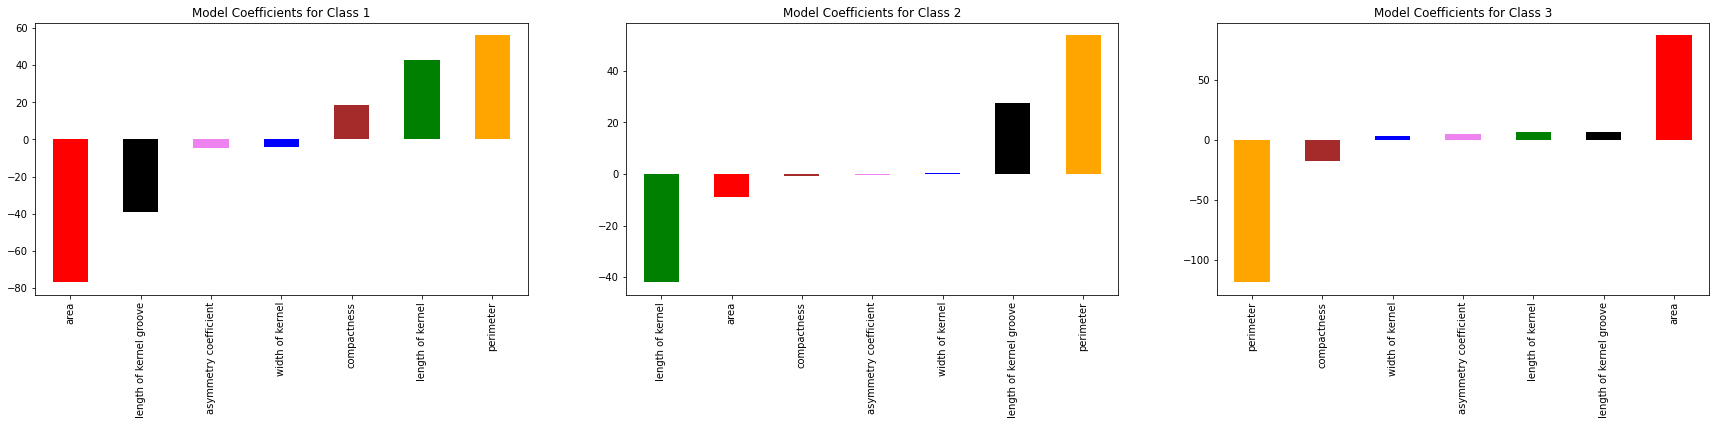

In [148]:
# assign color
color_list = ['red','orange','brown','green','blue','violet','black']
color_dict = dict(zip(X.columns.values,color_list))

# plot coefficient
fig, axes = plt.subplots(1,3, figsize=(30,5))

for n, target in enumerate(data['class'].unique()):
    coef = pd.Series(lda_coef[n], X.columns).sort_values()
    coef.plot(kind='bar', title=f'Model Coefficients for Class {target}', 
              color=map(color_dict.get, coef.index), ax=axes[n])

### RFC

In [166]:
param_grid = {'randomforestclassifier__n_estimators': [1, 10, 100], 
              'randomforestclassifier__max_depth': [1, 10, 100], 
              'randomforestclassifier__min_samples_split': [0.001, 0.01, 0.1], 
              'randomforestclassifier__min_samples_leaf': [0.1, 1, 10], 
              'randomforestclassifier__max_features': [n for n in range(1,4)]}

grid_search = GridSearchCV(pipe2, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=101))]),
             param_grid={'randomforestclassifier__max_depth': [1, 10, 100],
                         'randomforestclassifier__max_features': [1, 2, 3],
                         'randomforestclassifier__min_samples_leaf': [0.1, 1,
                                                                      10],
                         'randomforestclassifier__min_samples_split': [0.001,
                                                                       0.01,
                                                                       0.1],
                         'randomforestclassifier__n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['ac

In [167]:
grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 3,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 0.001,
 'randomforestclassifier__n_estimators': 100}

In [168]:
grid_search.best_score_

0.9253379953379953

In [169]:
rfc = grid_search

<AxesSubplot:>

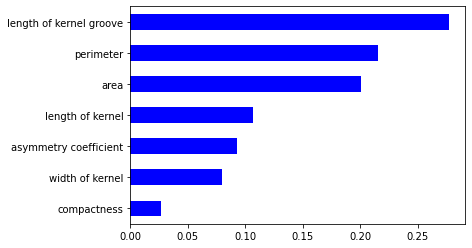

In [170]:
# get the best params feature importances
feaimp = pd.Series(rfc.best_estimator_._final_estimator.feature_importances_, index=X.keys()).sort_values(ascending=True)

feaimp.plot(kind='barh', 
            color='blue')

- based on the feature importance chart and correlation results, we try to remove **area** and **compactness** from the dataset and evaluate the performence to see if there is any improvement.

In [80]:
X_feaimp_train = X_train.copy()
X_feaimp_train = X_feaimp_train.drop(['area','compactness'], axis=1)

X_feaimp_test = X_test.copy()
X_feaimp_test = X_feaimp_test.drop(['area','compactness'], axis=1)

pipe2_feaimp = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=101))

In [81]:
param_grid = {'randomforestclassifier__n_estimators': [1, 10, 100], 
              'randomforestclassifier__max_depth': [1, 10, 100], 
              'randomforestclassifier__min_samples_split': [0.001, 0.01, 0.1], 
              'randomforestclassifier__min_samples_leaf': [0.1, 1, 10], 
              'randomforestclassifier__max_features': [n for n in range(1,4)]}

grid_search = GridSearchCV(pipe2_feaimp, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=101))]),
             param_grid={'randomforestclassifier__max_depth': [1, 10, 100],
                         'randomforestclassifier__max_features': [1, 2, 3],
                         'randomforestclassifier__min_samples_leaf': [0.1, 1,
                                                                      10],
                         'randomforestclassifier__min_samples_split': [0.001,
                                                                       0.01,
                                                                       0.1],
                         'randomforestclassifier__n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['ac

In [82]:
grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 3,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 0.001,
 'randomforestclassifier__n_estimators': 100}

In [83]:
grid_search.best_score_

0.9253379953379953

- in terms of f1 score, nothing is change from the model performance

In [85]:
rfc_feaimp = grid_search

In [171]:
df_rfc = best_params_scores(rfc)

display(df_rfc.T)

,146
params,"{'randomforestclassifier__max_depth': 10, 'ran..."
mean_train_accuracy,1
mean_test_accuracy,0.928309
mean_train_f1_macro,1
mean_test_f1_macro,0.925338


### KNN

In [92]:
# find k with cv
error_rate = []

for n in range(1,30):
    knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=n))
    pred_n = cross_val_predict(knn_pipe, X_train, y_train, cv=skfold)
    error_rate.append(np.mean(pred_n != y_train))

Text(0, 0.5, 'Error Rate')

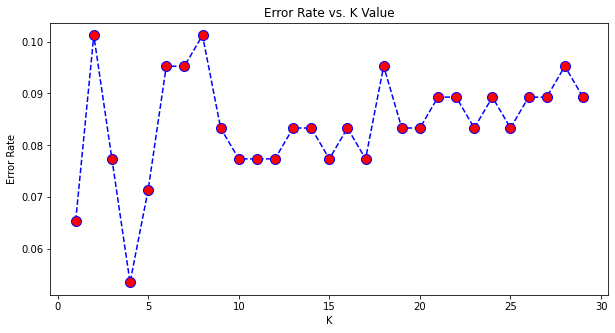

In [93]:
plt.figure(figsize=(10,5))

plt.plot(range(1,30),
         error_rate,color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- based on the error rate, k=4 is the best result.

In [98]:
param_grid = {'kneighborsclassifier__n_neighbors':[n for n in range(1,31)]}

grid_search = GridSearchCV(pipe3, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [100]:
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 4}

In [101]:
grid_search.best_score_

0.9451981351981351

In [128]:
knn = grid_search

In [137]:
df_knn = best_params_scores(knn)

display(df_knn.T)

,3
params,{'kneighborsclassifier__n_neighbors': 4}
mean_train_accuracy,0.972229
mean_test_accuracy,0.946324
mean_train_f1_macro,0.971793
mean_test_f1_macro,0.945198


## SVC

In [151]:
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipe4, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC(random_state=101))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [152]:
grid_search.best_params_

{'svc__C': 1000, 'svc__kernel': 'rbf'}

In [153]:
grid_search.best_score_

0.9631209531209531

In [154]:
# attempt 2
param_grid = {'svc__C': [1000, 2500, 5000, 7500, 10000],
              'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipe4, param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC(random_state=101))]),
             param_grid={'svc__C': [1000, 2500, 5000, 7500, 10000],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [155]:
grid_search.best_params_

{'svc__C': 1000, 'svc__kernel': 'rbf'}

- looks like C=1000 is the best choice.

In [157]:
svc = grid_search

In [162]:
df_svc = best_params_scores(svc)

display(df_svc.T)

,2
params,"{'svc__C': 1000, 'svc__kernel': 'rbf'}"
mean_train_accuracy,1
mean_test_accuracy,0.964338
mean_train_f1_macro,1
mean_test_f1_macro,0.963121


## Evaluation: Comparing Model 
### Mean Scores

In [172]:
summary_scores = pd.concat([df_lda,df_rfc,df_knn,df_svc],ignore_index=True)

display(summary_scores.T)

,0,1,2,3
params,{'lineardiscriminantanalysis__solver': 'svd'},"{'randomforestclassifier__max_depth': 10, 'ran...",{'kneighborsclassifier__n_neighbors': 4},"{'svc__C': 1000, 'svc__kernel': 'rbf'}"
mean_train_accuracy,0.959659,1,0.972229,1
mean_test_accuracy,0.952574,0.928309,0.946324,0.964338
mean_train_f1_macro,0.957842,1,0.971793,1
mean_test_f1_macro,0.950861,0.925338,0.945198,0.963121


- based on the mean train and test scores, LDA, KNN and SVC are good candidates.

### Confusion Matrix & Classification Report

In [174]:
chosen_models = []

chosen_models.append(('LDA', lda.best_estimator_))
chosen_models.append(('RFC', rfc.best_estimator_))
chosen_models.append(('KNN', knn.best_estimator_))
chosen_models.append(('SVM', svc.best_estimator_))

In [179]:
results_pred = []
names = []

for name, model in chosen_models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LDA:
[[48  2  3]
 [ 0 62  0]
 [ 3  0 50]]
              precision    recall  f1-score   support

           1       0.94      0.91      0.92        53
           2       0.97      1.00      0.98        62
           3       0.94      0.94      0.94        53

    accuracy                           0.95       168
   macro avg       0.95      0.95      0.95       168
weighted avg       0.95      0.95      0.95       168

RFC:
[[46  1  6]
 [ 2 60  0]
 [ 3  0 50]]
              precision    recall  f1-score   support

           1       0.90      0.87      0.88        53
           2       0.98      0.97      0.98        62
           3       0.89      0.94      0.92        53

    accuracy                           0.93       168
   macro avg       0.93      0.93      0.93       168
weighted avg       0.93      0.93      0.93       168

KNN:
[[48  2  3]
 [ 3 59  0]
 [ 1  0 52]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.91        53
   

### Misclassified Areas Plot

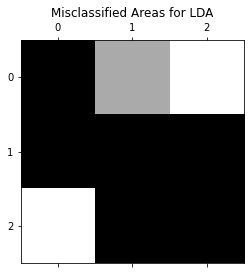

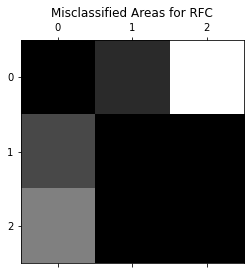

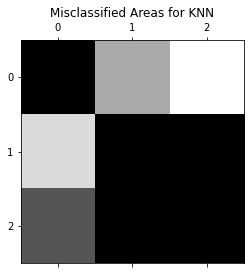

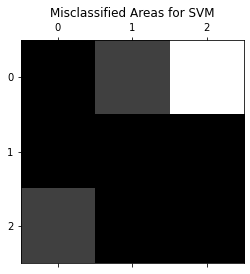

In [183]:
# plot misclassified areas
for name, results in zip(names,results_pred):
    con_mat = confusion_matrix(y_train, results)

    row_sums = con_mat.sum(axis=1, keepdims=True)
    norm_con_mat = con_mat / row_sums

    np.fill_diagonal(norm_con_mat, 0)
    plt.matshow(norm_con_mat, cmap=plt.cm.gray)

    plt.title(f'Misclassified Areas for {name}')
    plt.show()

- based on the confusion matrix, their classification report and misclassified areas plot, LDA and SVC both perform well.
- however, looking at their mean scores, SVC has a mean train accuracy score and mean train f1 macro score of 1, which might indicate overfitting.
- with these criterias, LDA will be chosen.

## Final Model

In [186]:
lda.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [191]:
final_model = lda.best_estimator_

final_model.fit(X_train, y_train)

pred = final_model.predict(X_test)

print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')

[[17  0  0]
 [ 0  8  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        17

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



- the LDA model is able to predict all correctly for the testing dataset.